<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Des_Grad_Adam_Aula_B38_19_OCT_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*******************************
Historial de Costo:
Iteración 0:91.56756524859085
Iteración 1:86.75310445687964
Iteración 2:82.07653425832954
Iteración 3:77.53989218056768
Iteración 4:73.14500277649827
Iteración 5:68.89346262600118
Iteración 6:64.78662613333714
Iteración 7:60.825592266365746
Iteración 8:57.0111923807028
Iteración 9:53.343979267516296
Iteración 10:49.824217557814436
Iteración 11:46.45187560884406
Iteración 12:43.22661898961988
Iteración 13:40.14780567266817
Iteración 14:37.21448302780997
Iteración 15:34.425386701229854
Iteración 16:31.77894144919029
Iteración 17:29.273263980548446
Iteración 18:26.906167845724145
Iteración 19:24.67517039196439
Iteración 20:22.577501785686362
Iteración 21:20.610116082418322
Iteración 22:18.76970430349543
Iteración 23:17.052709456352876
Iteración 24:15.455343412194921
Iteración 25:13.973605531271811
Iteración 26:12.603302902299683
Iteración 27:11.340072039111554
Iteración 28:10.179401854893252
Iteración 29:9.116657712853906
Iteración 30:8.

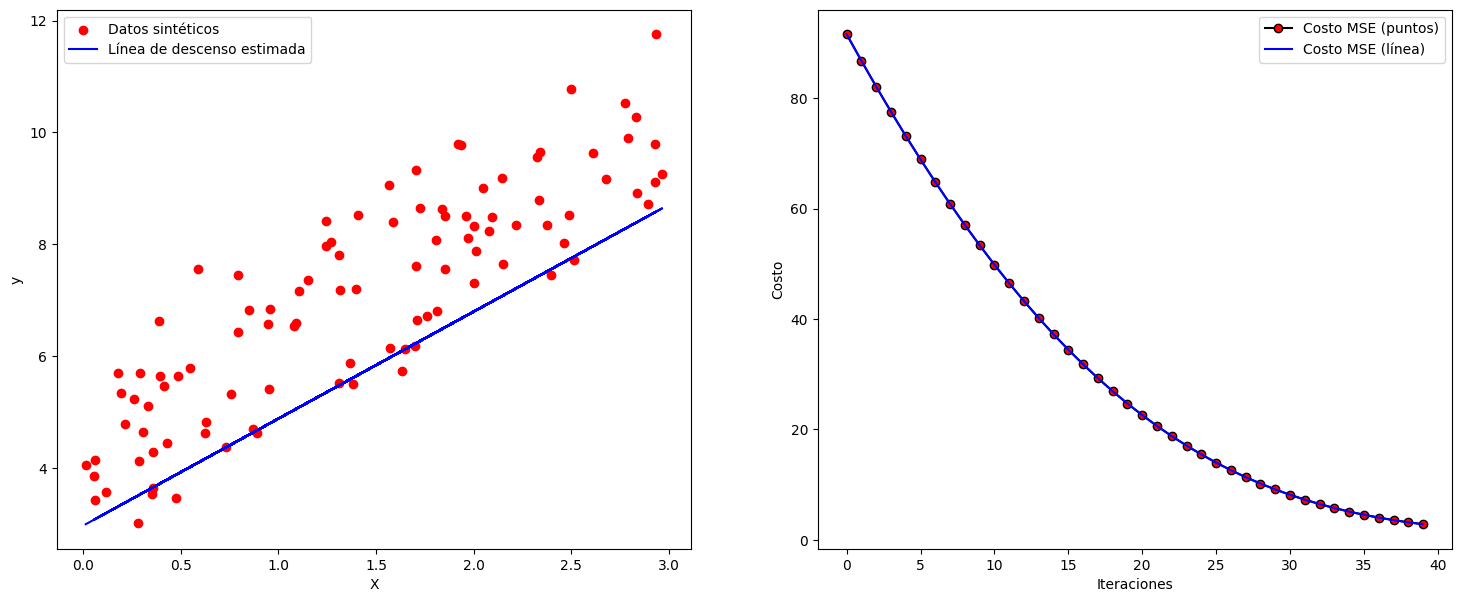

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Datos sintéticos con ruido
np.random.seed(0)
X = 3 * np.random.rand(100, 1)
y = 4 + 2 * X + np.random.randn(100, 1)

# Agregar una columna de unos a X para el término de sesgo
X_b = np.c_[np.ones((100, 1)), X]

# Parámetros iniciales
learning_rate = 0.1
beta1 = 0.9  # Factor de decaimiento para el primer momento
beta2 = 0.999  # Factor de decaimiento para el segundo momento
epsilon = 1e-7  # Pequeña constante para evitar división por cero

# Inicialización de pesos
theta = np.random.randn(2, 1)

# Listas para almacenar valores de costo y parámetros
costs = []
thetas = []

# Número de iteraciones
num_iterations = 40

# Algoritmo de descenso de gradiente Adam
m_t = np.zeros_like(theta)  # Primer momento
v_t = np.zeros_like(theta)  # Segundo momento
t = 0  # Contador de iteraciones

for i in range(num_iterations):

    # Corregimos el cálculo de gradientes
    gradients = 2 / len(X) * X_b.T.dot(X_b.dot(theta) - y)
    t += 1
    m_t = beta1 * m_t + (1 - beta1) * gradients
    v_t = beta2 * v_t + (1 - beta2) * gradients**2
    m_t_hat = m_t / (1 - beta1**t)
    v_t_hat = v_t / (1 - beta2**t)
    theta -= learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)
    cost = np.mean((X_b.dot(theta) - y)**2)
    costs.append(cost)
    thetas.append(theta)
print("*******************************")
print("Historial de Costo:")
for index, miscostos in enumerate(costs):
  print(f'Iteración {index}:{miscostos}')
print("*******************************")
# Gráfico de los datos y la línea de descenso estimada
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
plt.scatter(X, y, c='red', marker='o', label='Datos sintéticos')
plt.plot(X, X_b.dot(theta), c='blue', label='Línea de descenso estimada')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Gráfico de los valores del costo (MSE)
plt.subplot(1, 2, 2)
plt.plot(costs,color='black',marker='o',markerfacecolor='red', label='Costo MSE (puntos)')
plt.plot(costs, 'b-', label='Costo MSE (línea)')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()

plt.show()
